In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

In [2]:
# # Try these datasets.
# data = pd.read_csv('/kaggle/input/salary-data/Salary_Data.csv') 
# data = pd.read_csv('/kaggle/input/101-simple-linear-regressioncsv/1.01. Simple linear regression.csv')

In [3]:
# x = data.iloc[:,0].values
# y = data.iloc[:,-1].values

In [4]:
np.random.seed(0)
x = np.random.randn(1000,1).reshape(1,-1)[0]
y = 3 * x + 5 + np.random.normal(10,1.5,1000)

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = np.array(scaler.fit_transform(x_train.reshape(-1,1)))
x_test = np.array(scaler.fit_transform(x_test.reshape(-1,1)))

 Lets consider a hypothesized equation of line that will represent best fit line to our data.
### $\hat{Y} = mx + c$
        
### $\hspace{1cm}\hat{y} : \hspace{2mm}estimated \hspace{1mm}output$
        
### $\hspace{1cm}m    : \hspace{2mm}slope$

### $\hspace{1cm}c    : \hspace{2mm}y-intercept$


A cost function is a mathematical function that is minimized to get the optimal values of slope ‘m’ and y-intercept ‘c’. <br>The cost function associated with linear regression is called the mean squared error.

#### $Cost function : J(m,c) = \frac{1}{2n}\sum(y_i-\hat{y_i})^2$
#### $\hspace{5cm}=\frac{1}{2n}\sum(y_i- mx_i - c)^2$

Mathematically, the Gradient Descent works by calculating the partial derivative  to the current value of ‘m’ and ‘c’. <br>At each step, the value of both ‘m’ and ‘c’ get updated simultaneously. <br>The values will keep on updating until we reach the value of ‘m’ and ‘c’ for which the cost function reaches the minimum value.

### $m_{new} = m_{old} - learning\hspace{1mm}rate \times \frac{\partial}{\partial m} J(m,c) .......(i)$ 
### $c_{new} = c_{old} - learning\hspace{1mm}rate \times \frac{\partial}{\partial c} J(m,c) .......(ii)$ 
$\newline$
* ### $Partial \hspace{1mm}derivative \hspace{1mm} calculation.$
$\newline$
### $\frac{\partial}{\partial m} J(m,c) = \frac{\partial}{\partial m} \frac{1}{2n}\sum(y_i-\hat{y_i})^2$  
### $\frac{\partial}{\partial c} J(m,c) = \frac{\partial}{\partial c} \frac{1}{2n}\sum(y_i-\hat{y_i})^2$
$\newline$
* ### $Consider\hspace{1mm} partial\hspace{1mm} derivative\hspace{1mm} of \hspace{1mm}one \hspace{1mm}training \hspace{1mm}example.$
$\newline$

### $\hspace{5mm}\frac{\partial}{\partial m} J(m,c)=\frac{\partial}{\partial m} \frac{1}{2n}(y-\hat{y})^2$
### $\hspace{3cm}={_2}\frac{1}{2n}(y-\hat{y}) \times \frac{\partial}{\partial m} (y-\hat{y}) $
### $\hspace{3cm}=\frac{1}{n}(y-\hat{y}) \times \frac{\partial}{\partial m} (y-mx - c) $
### $\hspace{3cm}=\frac{1}{n}(y-\hat{y})\times {-x}$

***
### $\hspace{5mm}\frac{\partial}{\partial m} J(m,c) =\frac{-x}{n}(y-\hat{y}).......(iii)$ 
***

### $\hspace{5mm}\frac{\partial}{\partial c} J(m,c)=\frac{\partial}{\partial c} \frac{1}{2n}(y-\hat{y})^2$
### $\hspace{3cm}={_2}\frac{1}{2n}(y-\hat{y}) \times \frac{\partial}{\partial c} (y-\hat{y}) $
### $\hspace{3cm}=\frac{1}{n}(y-\hat{y}) \times \frac{\partial}{\partial c} (y-mx - c) $
### $\hspace{3cm}=\frac{1}{n}(y-\hat{y})\times {-1}$

***
### $\hspace{5mm}\frac{\partial}{\partial c} J(m,c)=\frac{-1}{n}(y-\hat{y}).......(iv)$
***


$\newline$
* ### $Substituting\hspace{1mm}\hspace{1mm} (iii)\hspace{1mm} and\hspace{1mm} (iv)\hspace{1mm} in \hspace{1mm}equation\hspace{1mm} (i) \hspace{1mm}and \hspace{1mm}(ii)\hspace{1mm} respectively.$
* ### $Derivative\hspace{1mm}\hspace{1mm} of \hspace{1mm}sum \hspace{1mm}is \hspace{1mm}sum \hspace{1mm}of \hspace{1mm}derivative.$
$\newline$


### $m_{new} = m_{old} - learning\hspace{1mm}rate \times \frac{\partial}{\partial m} J(m,c)$
### $m_{new} = m_{old} - learning\hspace{1mm}rate \times \frac{-x}{n}(y-\hat{y})$
***
### $m_{new} = m_{old} - learning\hspace{1mm}rate \times \frac{1}{n}\sum(y_i-\hat{y_i})\times {-x_i}$
***

$\newline$

### $c_{new} = c_{old} - learning\hspace{1mm}rate \times \frac{\partial}{\partial c} J(m,c)$
### $c_{new} = c_{old} - learning\hspace{1mm}rate \times \frac{-1}{n}(y-\hat{y})$
***
### $c_{new} = c_{old} - learning\hspace{1mm}rate \times \frac{1}{n}\sum(y_i-\hat{y_i})\times {-1} $
***

> We got final equation to update the parameters (m,c) of the hypothesized straight line. 

## Creating linear regression class

Gradient descent (GD) is an iterative first-order optimisation algorithm used to find a local minimum/maximum of a given function. 
<br>This method is commonly used in machine learning (ML) and deep learning(DL) to minimise a cost/loss function (e.g. in a linear regression).

In [7]:
class LinReg:
    def __init__(self):
        self.m = 0
        self.c = 0 
        self.learning_rate = 0.01

    def GD(self,x,y,epochs,learning_rate):
        dldm = 0.0
        dldc = 0.0
        m = 0.0
        c = 0.0
        n = x.shape[0]
        dldm = np.sum(-x * (y-(self.m*x+ self.c))) # .....(iii)
        dldc = np.sum(-1 * (y-(self.m*x+ self.c))) # .....(iv)

        m = self.m - (self.learning_rate * (1/n) * dldm) # final equation
        c = self.c - (self.learning_rate * (1/n) * dldc) # final equation
    
        yhat = m * x + c
        
        return m,c
        
    def fit(self,x ,y ,epochs ,learning_rate ,batch_size = None ,method = 'SGD'):
        if x.ndim >1:
            x = np.squeeze(x)
        if batch_size is None and method == 'GD':
            for i in range(epochs):
                self.m ,self.c = self.GD(x,y,epochs,learning_rate)
                            
        elif batch_size is not None and method == 'SGD':
            
            for i in range(epochs):
                for i in range(int(len(x)/batch_size)):
                    ind = random.sample(range(len(x)),batch_size)

                    x = x[ind]
                    y = y[ind]

                    self.m ,self.c =self.GD(x,y,epochs,learning_rate)
        
        elif batch_size is not None and method == 'GD':
            raise TypeError("fit() don't require keyword argument : 'batch_size' when method is GD.")
            
        elif batch_size is None and method == 'SGD':
            raise TypeError("fit() missing 1 required keyword argument : 'batch_size' when method is 'SGD'.")
                
            
    def predict(self,x):
        if x.ndim >1:
            x=np.squeeze(x)
        return self.m * x + self.c


In [8]:
model = LinReg()

In [9]:
model.fit(x_train ,y_train ,epochs=1000 ,learning_rate=0.01 ,method='GD') # Gradient descent.
# model.fit(x_train ,y_train ,batch_size = 90 ,epochs=900 ,learning_rate=0.01 ,method='SGD') # Stochastic gradient descent. 

In [10]:
y_preds = model.predict(x_test)

In [11]:
pd.DataFrame(np.concatenate([y_test.reshape(-1,1),
                np.round(y_preds,2).reshape(-1,1),
                (np.round(abs(y_test-y_preds),2)).reshape(-1,1)],axis = 1),columns = ['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,15.237176,15.86,0.62
1,14.914210,15.16,0.25
2,14.040529,13.80,0.24
3,15.079553,14.22,0.86
4,6.567477,8.83,2.27
...,...,...,...
295,10.932325,10.12,0.81
296,9.844315,11.40,1.55
297,11.289134,12.07,0.78
298,12.839965,13.96,1.12


In [12]:
loss = np.divide(np.sum((y_test-y_preds)**2),2*x.shape[0])
loss

0.33403914488647946

In [13]:
model.m # 2.9878865427158687 

2.987757551926699

In [14]:
model.c # 14.913481885455708

14.912838051839474

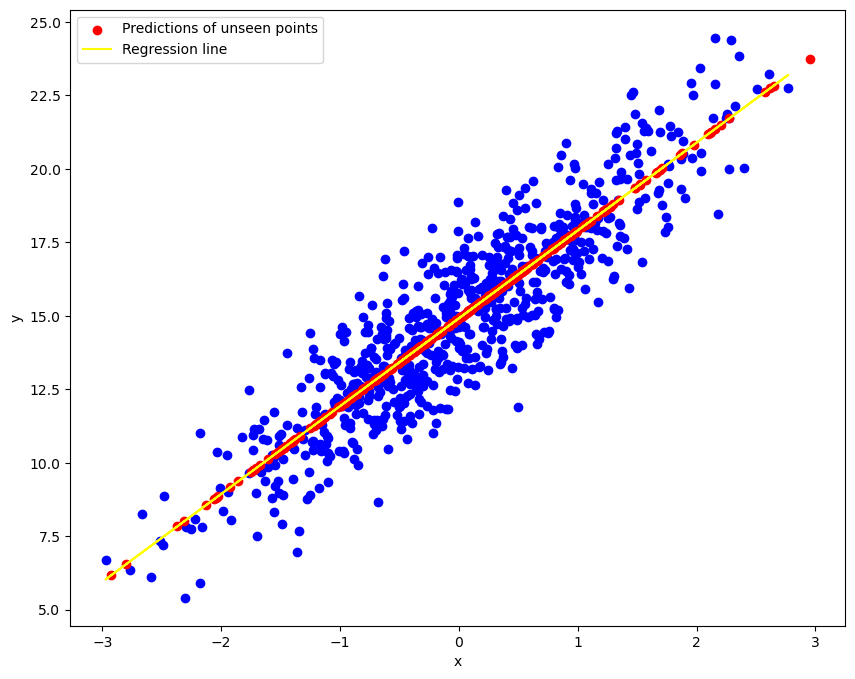

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(x_train,y_train,color='blue')
plt.scatter(x_test,model.predict(x_test),color='red',label="Predictions of unseen points")
plt.plot(x_train,model.predict(x_train),color='yellow',label="Regression line")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Alternative way to check our gradient descent parameters for simple linear regression.

## Least square method
 Under most situation, you can choose to use either ordinary least square or gradient descent.
 <br>With small dataset OLS is preferred. However, if features are too large, should consider using gradient descent as it would compute faster.
*  Least squares problems are optimization problems in which the objective (error) function may be expressed as a sum of squares.
*  While Gradient Descent is an algorithm to construct the solution of an optimization problem approximately.

* gradient descent is one of the ways (like OLS) to find optimum values of regression coefficients (m ,c) to bring the error term E in linear regression close to zero.
 <br> Unlike OLS, gradient descent does not try to solve any closed for solution. 


* It achieves the same objective by more crude way of starting with random values of regression coefficients (m ,c) and iteratively changing them to achieve the lowest value of error term E.

In [16]:
def leastsquare(x,y):
    if x.ndim > 1:
        x=np.squeeze(x)
    d= x-np.mean(x)
    m = np.divide(np.sum((d)*y),np.sum((d)**2))
    return m,np.divide(np.sum(y),x.shape[0])

In [17]:
m1,c1 = leastsquare(x_train,y_train)
print(m1,c1) # results are same or apporximately same as our gradient descent.

2.9878865427158687 14.913481885455708
